In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
df=pd.read_csv('bolia_text.csv',sep=';')

In [3]:
df.head(10)

,s_no,id,ig_id,comments_count,like_count,media_type,media_url,permalink,timestamp,year,caption,hashtag_caption,comments_text
0,1,17882074621524368,2255953652502305491,3,436,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/88...,https://www.instagram.com/p/B9OweT3JRrT/,2020-03-02T12:04:13+0000,2020,"The Plateau coffee tables, designed by Büro Fa...","[#bolia, #plateau, #coffeetable]",👏👏👏$😍😍😍😍😍😍$😍$
1,2,17863744909714707,2254422543016801358,15,2670,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,https://www.instagram.com/p/B9JUVvCJjRO/,2020-02-29T09:22:11+0000,2020,Welcome to a world of design. A world to explo...,"[#bolia, #springcollection]",Hi @marianeloewe It is our Plateau coffee tab...
2,3,17900396533442499,2252960888948937870,2,267,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/83...,https://www.instagram.com/p/B9EH_3mplSO/,2020-02-27T08:58:08+0000,2020,We are immensely proud of our Scandinavian her...,"[#bolia, #boliadesignawards]","Congrats!!! 🖤$Stay tuned.., I am working in a ..."
3,4,17887225669493545,2252405229819926093,6,813,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,https://www.instagram.com/p/B9CJp9tphZN/,2020-02-26T14:34:08+0000,2020,Our Leaves floor lamp combines an elegant desi...,"[#bolia, #usbyyou, #leaves]",Thank you ❤️$❤️❤️❤️$Love the terrazzo foot in ...
4,5,17896715572453731,2250754357394263231,2,944,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,https://www.instagram.com/p/B88SSm9Jcy_/,2020-02-24T07:54:09+0000,2020,Filur is a dining table that gives the classic...,"[#bolia, #filur, #dining]",Like it ✌🏼$😍😍😍😍$
5,6,18053058715208752,2249411063213115706,6,1139,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,https://www.instagram.com/p/B83g3Gwpsk6/,2020-02-22T11:25:16+0000,2020,Fang playfully captures the eye with shadow an...,"[#bolia, #fang, #highboard]",Like it ✌🏼$😍👌🏼$😍$😍$
6,7,17877165379558589,2247954424425559113,6,912,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/84...,https://www.instagram.com/p/B8yVqOLJzRJ/,2020-02-20T11:11:11+0000,2020,Caisa is a modular sofa with a refined and ele...,"[#bolia, #caisa, #sofa]",👌$Lovely🙌$The best one! 😍$@evianne_gort$Hvad h...
7,8,17850497779894615,2246641750467082027,8,1199,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/84...,https://www.instagram.com/p/B8trMTSJvcr/,2020-02-18T15:43:08+0000,2020,The Flachmann pendant is simple and timeless a...,"[#bolia, #flachmann, #lamp]",@llhuset något för dig?$These are gorgeous! Th...
8,9,18094387723189270,2244979301896486973,0,787,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/84...,https://www.instagram.com/p/B8nxMfZpQA9/,2020-02-16T08:40:09+0000,2020,Noora is the ultimate starting point for your ...,"[#bolia, #noora, #sofa]",NaN
9,10,17861864344711390,2243518164097129495,6,919,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/82...,https://www.instagram.com/p/B8ik-IyJVwX/,2020-02-14T08:17:08+0000,2020,You could of course buy her beautiful flowers....,"[#bolia, #valentinesday, #greenliving]","Love, love the irregular and fluid shapes of t..."


In [4]:
# Convert to list
df['data'] = df.comments_text.tolist()
data=df['data']


In [5]:
data

0                                           👏👏👏$😍😍😍😍😍😍$😍$
1       Hi @marianeloewe  It is our Plateau coffee tab...
2       Congrats!!! 🖤$Stay tuned.., I am working in a ...
3       Thank you ❤️$❤️❤️❤️$Love the terrazzo foot in ...
4                                        Like it ✌🏼$😍😍😍😍$
                              ...                        
1641                                                  NaN
1642                                                  NaN
1643    Riktigt snygg, men är det bra ljud?$http://www...
1644                                                  NaN
1645    Vil så gerne have det fine ur hængende i min n...
Name: data, Length: 1646, dtype: object

In [6]:
# Pre-processing steps for data

df['data'] = [re.sub('\s*@\s*\s?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\_', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('@"[\d-]"', ' ', str(sent)) for sent in df['data']]

# Remove new line characters
df['data'] = [re.sub('\s+', ' ', str(sent)) for sent in df['data']]

# Remove distracting single quotes
df['data'] = [re.sub("\'", " ", str(sent)) for sent in df['data']]

#Converting into lowercase
df['data']=df['data'].str.lower()

In [7]:
#Remove Emojis from column comments_text
df['data'] = df['data'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [8]:
df['data']

0                                                        
1       hi marianeloewe it is our plateau coffee table...
2       congrats stay tuned.., i am working in a very ...
3       thank you love the terrazzo foot in contrast w...
4                                                like it 
                              ...                        
1641                                                  nan
1642                                                  nan
1643    riktigt snygg, men är det bra ljud http://www....
1644                                                  nan
1645    vil så gerne have det fine ur hængende i min n...
Name: data, Length: 1646, dtype: object

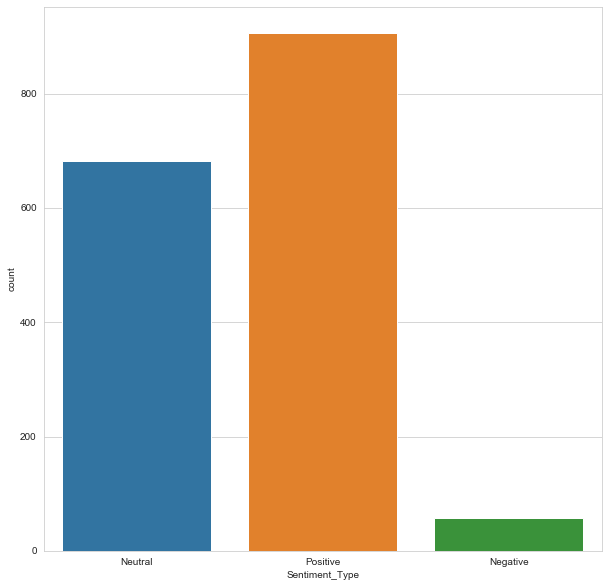

In [9]:
from textblob import TextBlob

bloblist_desc = list()

df_comments=df['data'].astype(str)
for row in df_comments:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_comments_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_comments_polarity_desc):
    if df_comments_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_comments_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_comments_polarity_desc['Sentiment_Type'] = df_comments_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_comments_polarity_desc)

In [11]:
 df_comments_polarity_desc.to_csv('new.csv',sep=';')